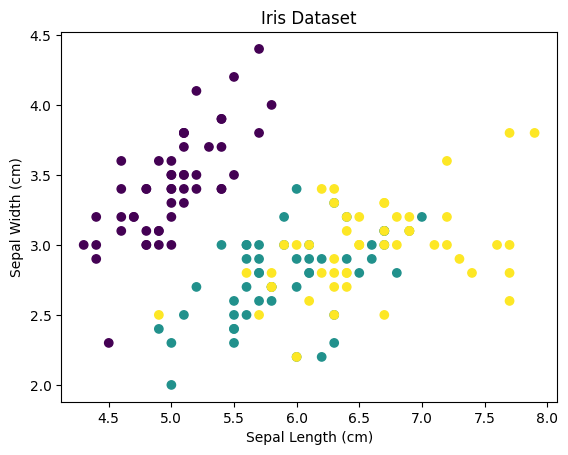

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

# Load the dataset
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualize the dataset
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset')
plt.show()

In [8]:

from sklearn.model_selection import train_test_split
x=df.drop('target', axis=1)
y=df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_test.shape, y_test.shape,x_train.shape, y_train.shape

((30, 4), (30,), (120, 4), (120,))

In [14]:
from math import gamma
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
cross_val_score(SVC(kernel='linear', C=10, gamma='auto'), x_train, y_train, cv=3)
cross_val_score(SVC(kernel='rbf', C=20, gamma='auto'), x_train, y_train, cv=3)


array([0.95 , 0.9  , 0.975])

In [15]:
kernel=['linear', 'rbf', 'poly' ]
C=[0.1, 1, 10, 100]
gamma=[0.001, 0.01, 0.1, 1]
avg_score={}
for k in kernel:
    for c in C:
        for g in gamma:
            model=SVC(kernel=k, C=c, gamma=g)
            score=cross_val_score(model, x_train, y_train, cv=3)
            avg_score[(k,c,g)]=np.mean(score)

avg_score


{('linear', 0.1, 0.001): np.float64(0.9583333333333334),
 ('linear', 0.1, 0.01): np.float64(0.9583333333333334),
 ('linear', 0.1, 0.1): np.float64(0.9583333333333334),
 ('linear', 0.1, 1): np.float64(0.9583333333333334),
 ('linear', 1, 0.001): np.float64(0.975),
 ('linear', 1, 0.01): np.float64(0.975),
 ('linear', 1, 0.1): np.float64(0.975),
 ('linear', 1, 1): np.float64(0.975),
 ('linear', 10, 0.001): np.float64(0.9500000000000001),
 ('linear', 10, 0.01): np.float64(0.9500000000000001),
 ('linear', 10, 0.1): np.float64(0.9500000000000001),
 ('linear', 10, 1): np.float64(0.9500000000000001),
 ('linear', 100, 0.001): np.float64(0.9500000000000001),
 ('linear', 100, 0.01): np.float64(0.9500000000000001),
 ('linear', 100, 0.1): np.float64(0.9500000000000001),
 ('linear', 100, 1): np.float64(0.9500000000000001),
 ('rbf', 0.1, 0.001): np.float64(0.5583333333333333),
 ('rbf', 0.1, 0.01): np.float64(0.5583333333333333),
 ('rbf', 0.1, 0.1): np.float64(0.9),
 ('rbf', 0.1, 1): np.float64(0.93333

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.cv_results_



{'mean_fit_time': array([0.00803606, 0.00797335, 0.00597135, 0.00557637, 0.00757901,
        0.00499829, 0.00318694, 0.00328676, 0.00500353, 0.00450118,
        0.00666968, 0.00932137, 0.00464598, 0.00534169, 0.00431236,
        0.00273736, 0.00288765, 0.00296474, 0.00430934, 0.00340684,
        0.00300082, 0.00304039, 0.0030117 , 0.01271828, 0.00307186,
        0.00333452, 0.00334676, 0.00299986, 0.00298452, 0.0028073 ,
        0.00271066, 0.00198571, 0.00233555, 0.0024085 , 0.00245039,
        0.01466934, 0.00278227, 0.00433326, 0.00367888, 0.00365551,
        0.00401982, 0.00440701, 0.00433262, 0.00459035, 0.00692884,
        0.00430083, 0.0057532 , 0.02235842]),
 'std_fit_time': array([2.21205692e-03, 7.35962905e-04, 4.78916575e-04, 4.24635872e-04,
        8.18215358e-04, 9.98958356e-07, 8.59399405e-04, 6.60988793e-04,
        2.32245750e-06, 3.74792456e-04, 2.05383288e-03, 4.15513574e-03,
        4.83707733e-04, 4.80539742e-04, 9.39235467e-04, 5.26465090e-04,
        1.63643206e-0

In [18]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008036,2.212057e-03,0.006376,0.001187,0.1,0.001,linear,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.975,0.925,0.975,0.958333,0.023570,5
1,0.007973,7.359629e-04,0.008221,0.001369,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.325,0.675,0.675,0.558333,0.164992,41
2,0.005971,4.789166e-04,0.004879,0.000173,0.1,0.001,poly,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",0.325,0.550,0.600,0.491667,0.119606,44
3,0.005576,4.246359e-04,0.004097,0.000138,0.1,0.010,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.975,0.925,0.975,0.958333,0.023570,5
4,0.007579,8.182154e-04,0.006421,0.001826,0.1,0.010,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.325,0.675,0.675,0.558333,0.164992,41
5,0.004998,9.989584e-07,0.004456,0.000643,0.1,0.010,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.325,0.550,0.600,0.491667,0.119606,44
6,0.003187,8.593994e-04,0.003930,0.000820,0.1,0.100,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.975,0.925,0.975,0.958333,0.023570,5
7,0.003287,6.609888e-04,0.003265,0.000527,0.1,0.100,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.825,0.950,0.925,0.900000,0.054006,39
8,0.005004,2.322458e-06,0.003701,0.000918,0.1,0.100,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",1.000,0.900,0.975,0.958333,0.042492,5
9,0.004501,3.747925e-04,0.003616,0.000445,0.1,1.000,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.975,0.925,0.975,0.958333,0.023570,5


In [21]:
results[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score', ]]

,param_kernel,param_C,param_gamma,mean_test_score
0,linear,0.1,0.001,0.958333
1,rbf,0.1,0.001,0.558333
2,poly,0.1,0.001,0.491667
3,linear,0.1,0.010,0.958333
4,rbf,0.1,0.010,0.558333
5,poly,0.1,0.010,0.491667
6,linear,0.1,0.100,0.958333
7,rbf,0.1,0.100,0.900000
8,poly,0.1,0.100,0.958333
9,linear,0.1,1.000,0.958333


In [22]:
# best parametres
best_params = grid_search.best_params_
best_params

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [33]:
# randomized seracha
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}
random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=4, cv=3, scoring='accuracy')
random_search.fit(x, y)
pd.DataFrame(random_search.cv_results_)[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]

,param_kernel,param_C,param_gamma,mean_test_score
0,poly,100,0.001,0.480000
1,linear,100,0.001,0.966667
2,poly,100,0.100,0.960000
3,linear,100,0.010,0.966667


In [31]:
random_search

,estimator,SVC()
,param_distributions,"{'C': [0.1, 1, ...], 'gamma': [0.001, 0.01, ...], 'kernel': ['linear', 'rbf', ...]}"
,n_iter,4
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [41]:
# now multiple models like like linear  logistic forest svnm and thier multiple paramters
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}
results = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    results[model_name] = grid_search.best_params_
    #also show the best score
    print(f"{model_name} Best Parameters: {grid_search.best_params_}, Best Score: {grid_search.best_score_}")





Logistic Regression Best Parameters: {'C': 1}, Best Score: 0.9666666666666667
Random Forest Best Parameters: {'max_depth': 20, 'n_estimators': 200}, Best Score: 0.9583333333333334
SVM Best Parameters: {'C': 1, 'kernel': 'linear'}, Best Score: 0.975


,Logistic Regression,Random Forest,SVM
C,1.0,NaN,1
max_depth,NaN,NaN,NaN
n_estimators,NaN,100.0,NaN
kernel,NaN,NaN,linear


In [42]:
#save that model
import joblib
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')

['best_model.pkl']